In [9]:
#surinkite iš puslapių nuo 2 iki 11-to butų skelbimus ir tokią informaciją - kaina, kaina už 1 kv metrą, adresas, plotas, kambarių kiekis. 
# šiuos duomenis eksportuokite į csv failą, skirtukas turi būti ;.
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs,
# daugiau nei 3 VDU - neįperkami.
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

import selenium
import pandas as pd
import undetected_chromedriver as uc
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time # dėl sleep komandos

opcijos = Options()
opcijos.add_argument('--incognito')

driver = uc.Chrome(options=opcijos)

linkas = []
adresas = []
kambariai = []
plotas = []
kaina = []
kaina_m2 = []

for i in range(2,5):
    url = "https://www.aruodas.lt/butai/puslapis/"+str(i)+"/"
    driver.get(url)
    time.sleep(15)
    source = driver.page_source # pasiima puslapio html kodą
    bs = BeautifulSoup(source, 'html.parser') # teoriškai išparsinome puslapio html
    
    ResultsSet = bs.find_all('div', {'advert-flex'})
    for skelbimas in ResultsSet:
        try:
            tag = skelbimas.find('div', {'list-adress-v2'}).find('h3').find('a', href=True)
            linkas.append(tag['href'])
            tekstas = tag.contents
            f = ''
            for i in tekstas:
                f = f + str(i).strip()
            adresas.append(f.replace('<br/>', ', '))
            kaina.append(skelbimas.find('div', {'class':'price'}).find('span', {'class':'list-item-price-v2'}).text.strip().replace(' ','')[:-1])
            kaina_m2.append(skelbimas.find('div', {'class':'price'}).find('span', {'class':'price-pm-v2'}).text.strip().replace(' ','')[:-4])
            kambariai.append(skelbimas.find('div', {'list-RoomNum-v2 list-detail-v2'}).text.strip())
            plotas.append(skelbimas.find('div', {'list-AreaOverall-v2 list-detail-v2'}).text.strip())
        except:
            pass
                                        
driver.close()

aruodas_data = pd.DataFrame()
aruodas_data['linkas'] = linkas
aruodas_data['adresas'] = adresas
aruodas_data['kaina'] = kaina
aruodas_data['kaina_m2'] = kaina_m2
aruodas_data['kambariai'] = kambariai
aruodas_data['plotas'] = plotas

aruodas_data.to_csv('aruodas_data.csv', sep=';')

In [10]:
aruodas_data = pd.read_csv('aruodas_data.csv', sep=';')
print(aruodas_data['kaina'].mean())
print(aruodas_data['kaina_m2'].mean())
print(aruodas_data['kambariai'].mean())
print(aruodas_data['plotas'].mean())

189849.45333333334
3412.8133333333335
2.2933333333333334
54.76906666666667


In [18]:
def flat_price_group(a):
    vdu = 1303.80
    if a < vdu:
        return 'Pigus'
    elif a < vdu*3:
        return 'Brangus'
    else:
        return 'Neįperkamas'

def miestas(a):
    return a.split(',')[0]

aruodas_data['flat_price_group'] = aruodas_data['kaina_m2'].apply(flat_price_group)
aruodas_data['miestas'] = aruodas_data['adresas'].apply(miestas)
aruodas_data.head(10)

,Unnamed: 0,linkas,adresas,kaina,kaina_m2,kambariai,plotas,flat_price_group,miestas
0,0,https://www.aruodas.lt/butai-vilniuje-burbiske...,"Vilnius, Burbiškės, Burbiškių g.",200860,3453,3,58.17,Brangus,Vilnius
1,1,https://www.aruodas.lt/butai-kaune-vilijampole...,"Kaunas, Vilijampolė, Raudondvario pl.",47500,2317,2,20.50,Brangus,Kaunas
2,2,https://www.aruodas.lt/butai-vilniuje-senamies...,"Vilnius, Senamiestis, Teatro g.",390000,6725,2,57.99,Neįperkamas,Vilnius
3,3,https://www.aruodas.lt/butai-vilniuje-antakaln...,"Vilnius, Antakalnis, Duburio g.",168500,2462,3,68.44,Brangus,Vilnius
4,4,https://www.aruodas.lt/butai-palangoje-s-dauka...,"Palanga, S. Daukanto g.",435000,5959,4,73.00,Neįperkamas,Palanga
5,5,https://www.aruodas.lt/butai-palangoje-s-dauka...,"Palanga, S. Daukanto g.",312000,6933,3,45.00,Neįperkamas,Palanga
6,6,https://www.aruodas.lt/butai-kaune-zaliakalnyj...,"Kaunas, Žaliakalnis, Žeimenos g.",199000,2647,3,75.19,Brangus,Kaunas
7,7,https://www.aruodas.lt/butai-vilniuje-snipiske...,"Vilnius, Šnipiškės, Kalvarijų g.",127750,3901,1,32.75,Brangus,Vilnius
8,8,https://www.aruodas.lt/butai-vilniuje-snipiske...,"Vilnius, Šnipiškės, Konstitucijos pr.",324000,5438,2,59.58,Neįperkamas,Vilnius
9,9,https://www.aruodas.lt/butai-kaune-zaliakalnyj...,"Kaunas, Žaliakalnis, Žemaičių g.",100737,1564,2,64.42,Brangus,Kaunas


In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


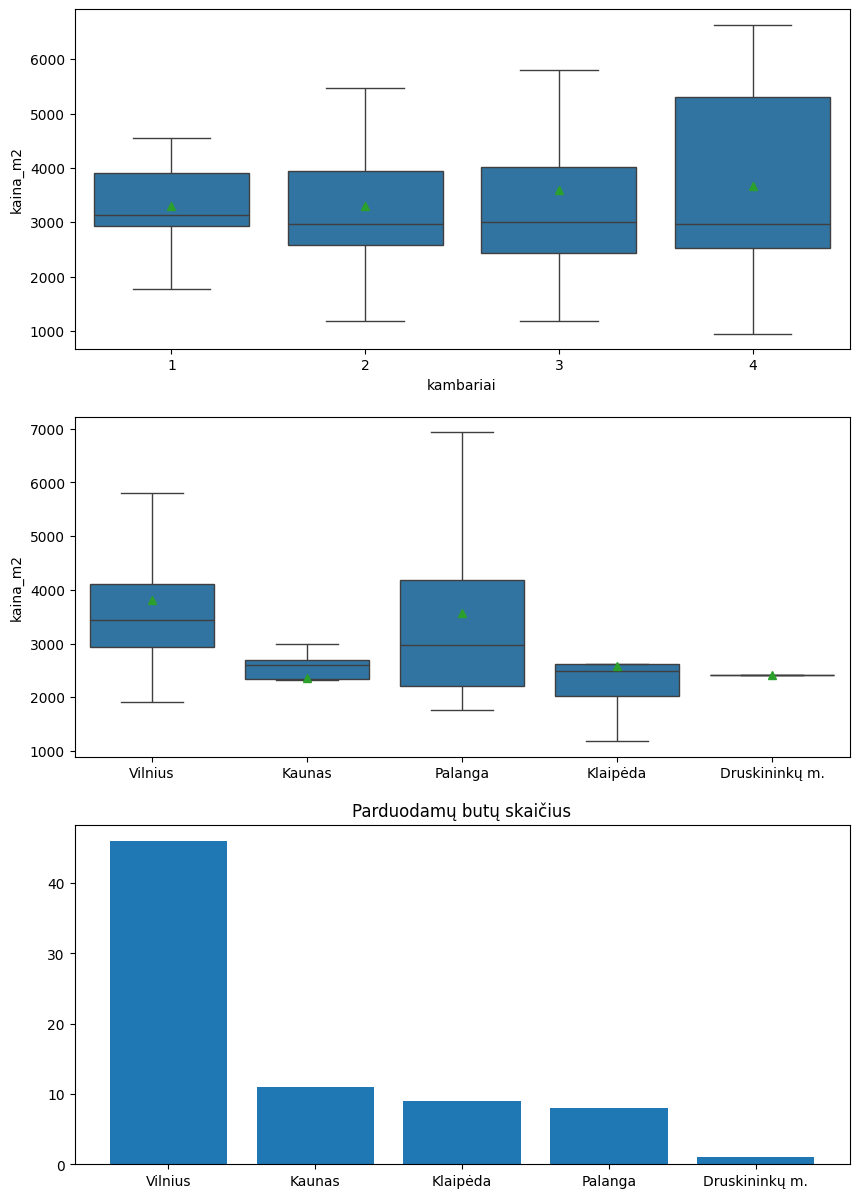

In [63]:
fig, axes  = plt.subplots(3,1,  figsize=(10, 15))
sns.boxplot(ax=axes[0], data=aruodas_data, x='kambariai', y='kaina_m2', showmeans=True, showfliers=False)
sns.boxplot(ax=axes[1], data=aruodas_data, x='miestas', y='kaina_m2', showmeans=True, showfliers=False)

axes[1].set_xlabel(None)

miestai_count = aruodas_data['miestas'].value_counts().reset_index()
axes[2] = plt.bar(miestai_count['miestas'], miestai_count['count'])
plt.title('Parduodamų butų skaičius')

plt.show()
fig.tight_layout()